**Import Libraries/Dataset**

1. Import the required libraries and the dataset (use Google Drive if required).

  Imported libraries and dataset given on kaggle(uploaded on drive)

2. Check the GPU available (recommended- use free GPU provided by Google Colab).

  Enabled GPU from Edit -> Notebook Settings

In [49]:
#import libraries
import os
import zipfile

In [50]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [51]:
#extract dataset zip file into /tmp directory
local_zip = '/content/drive/MyDrive/dataset.zip'
zip_ref = zipfile.ZipFile(local_zip, mode='r')
zip_ref.extractall('/tmp')
zip_ref.close()

**Data Visualization and augmentation**
1. Plot at least two samples from each class of the dataset (use matplotlib/seaborn/any other library).
2. Apply rotation and height shift augmentation (rotation_range, height_shift_range)to the dataset separately. Print the augmented image and the original image for each class and each augmentation.
3. Bring the train and test data in the required format.
4. Print the shapes of train and test data.
 

The contents of the .zip are extracted to the base directory `/tmp/dataset`, which contains `training_set` and `test_set` subdirectories for the training and validation datasets , validation, and test sets, which in turn each contain `cats` and `dogs` subdirectories. Let's define each of these directories:

In [52]:
base_dir = '/tmp/dataset'
train_dir = os.path.join(base_dir, 'training_set')
test_dir = os.path.join(base_dir, 'test_set')

# Directory with our training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')

# Directory with our training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')

# Directory with our test cat pictures
test_cats_dir = os.path.join(test_dir, 'cats')

# Directory with our test dog pictures
test_dogs_dir = os.path.join(test_dir, 'dogs')

In [53]:
#print 5 image names from each class 
train_cat_fnames = os.listdir(train_cats_dir)
print(train_cat_fnames[:10])

train_dog_fnames = os.listdir(train_dogs_dir)
train_dog_fnames.sort()
print(train_dog_fnames[:10])

['cat.1950.jpg', 'cat.3529.jpg', 'cat.1455.jpg', 'cat.3488.jpg', 'cat.1976.jpg', 'cat.3819.jpg', 'cat.688.jpg', 'cat.1433.jpg', 'cat.506.jpg', 'cat.1515.jpg']
['dog.1.jpg', 'dog.10.jpg', 'dog.100.jpg', 'dog.1000.jpg', 'dog.1001.jpg', 'dog.1002.jpg', 'dog.1003.jpg', 'dog.1004.jpg', 'dog.1005.jpg', 'dog.1006.jpg']


Let's find out the total number of cat and dog images in the `training_Set` and `test_set` directories:

In [54]:
#Print total images in directory for each class
print('total training cat images:', len(os.listdir(train_cats_dir)))
print('total training dog images:', len(os.listdir(train_dogs_dir)))
print('total test cat images:', len(os.listdir(test_cats_dir)))
print('total test dog images:', len(os.listdir(test_dogs_dir)))

total training cat images: 4000
total training dog images: 4000
total test cat images: 1000
total test dog images: 1000


For each cats and dogs classes, we have 4,000 training images and 1000 test images. 

Now let's take a look at a few pictures to get a better sense of what the cat and dog datasets look like. First, configure the matplot parameters:

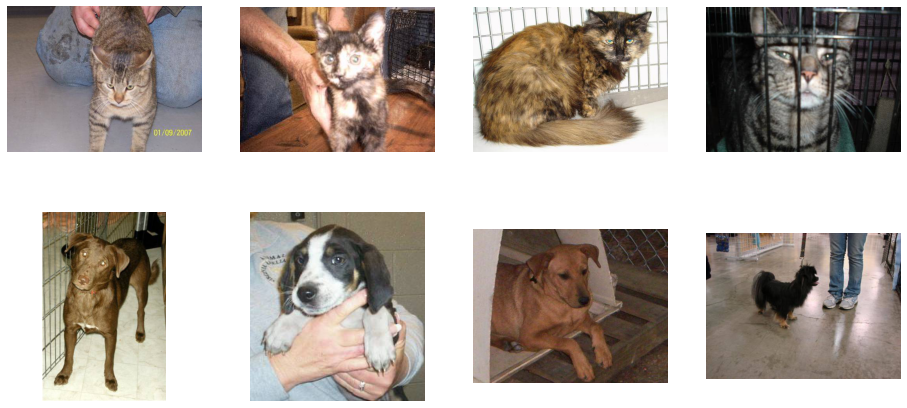

In [55]:
##Plot at least two samples from each class of the dataset
### Plot 4 images from each class
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 4
next_cat_pix = [os.path.join(train_cats_dir, fname) 
                for fname in train_cat_fnames[pic_index-4:pic_index]]
next_dog_pix = [os.path.join(train_dogs_dir, fname) 
                for fname in train_dog_fnames[pic_index-4:pic_index]]

for i, img_path in enumerate(next_cat_pix+next_dog_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

Now, display a batch of 8 cat and 8 dog pictures. You can rerun the cell to see a fresh batch each time:

## Model Building

1)Sequential Model layers- Use AT LEAST 3 hidden layers with appropriate input for each. Choose the best number for hidden units and give reasons.

2)Add L2 regularization to all the layers.

3)Add one layer of dropout at the appropriate position and give reasons.

4)Choose the appropriate activation function for all the layers.
Print the model summary

In [56]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import Model
from keras.layers import Activation, Dense, Dropout
from tensorflow.keras import regularizers

In [57]:
# Our input feature map is 150x150x3: 150x150 for the image pixels, and 3 for
# the three color channels: R, G, and B
img_input = layers.Input(shape=(150, 150, 3))

# First convolution extracts 16 filters that are 3x3
# Convolution is followed by max-pooling layer with a 2x2 window
x = layers.Conv2D(16, 3,activation='relu')(img_input)
x = layers.MaxPooling2D(2)(x)

# Second convolution extracts 32 filters that are 3x3
# Convolution is followed by max-pooling layer with a 2x2 window
x = layers.Conv2D(32, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)

# Third convolution extracts 64 filters that are 3x3
# Convolution is followed by max-pooling layer with a 2x2 window
x = layers.Conv2D(64, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)

In [58]:
# Flatten feature map to a 1-dim tensor so we can add fully connected layers
x = layers.Flatten()(x)

# 3 layers with units as 512, 256 and 128 

# Create a fully connected layer with ReLU activation and 512 hidden units
x = layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.001))(x)


# Layer 2 = hidden layer  with Regularizers
x = layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.001))(x)

# Add dropout of 50% to layer 2
x = layers.Dropout(0.5)(x)

# Layer 3 = hidden layer 
x = layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.001))(x)                


# Create output layer with a single node and sigmoid activation
output = layers.Dense(1, activation='sigmoid')(x)

# Create model:
# input = input feature map
# output = input feature map + stacked convolution/maxpooling layers + fully 
# connected layer + sigmoid output layer
model = Model(img_input, output)


## Model Summary

In [59]:
model.summary()

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 conv2d_9 (Conv2D)           (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 74, 74, 16)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 36, 36, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 34, 34, 64)        1849

# Model Compilation
Compile the model with the appropriate loss function.

Use an appropriate optimizer. Give reasons for the choice of learning rate and its value.

Use accuracy as a metric.


We are training our model with the binary_crossentropy loss, because it's a binary classification problem and our final activation is a sigmoid. We have used the rmsprop optimizer with a learning rate of 0.001. During training, we will want to monitor classification accuracy.

NOTE: In this case, using the RMSprop optimization algorithm is preferable to stochastic gradient descent (SGD), because RMSprop automates learning-rate tuning for us. (Other optimizers, such as Adam and Adagrad, also automatically adapt the learning rate during training, and would work equally well here.)

In [60]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(learning_rate=0.001),
              metrics=['acc'])

### Visualizing Intermediate Representations

1.   Cat
2.   Dog


Let's pick a random cat or dog image from the training set, and then generate a figure where each row is the output of a layer, and each image in the row is a specific filter in that output feature map. Rerun this cell to generate intermediate representations for a variety of training images.

### Model Training
Let's train on all 8,000 images available, for 15 epochs, and validate on all 2,000 validation images.

In [61]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255,
        rotation_range=40,
        height_shift_range=0.2)

test_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches of 80 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        train_dir,  # This is the source directory for training images
        target_size=(150, 150),  # All images will be resized to 150x150
        batch_size=80,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

# Flow Test images in batches of 20 using test_datagen generator
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(150, 150),
        batch_size=80,
        shuffle=False,
        class_mode='binary') 

Found 8000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


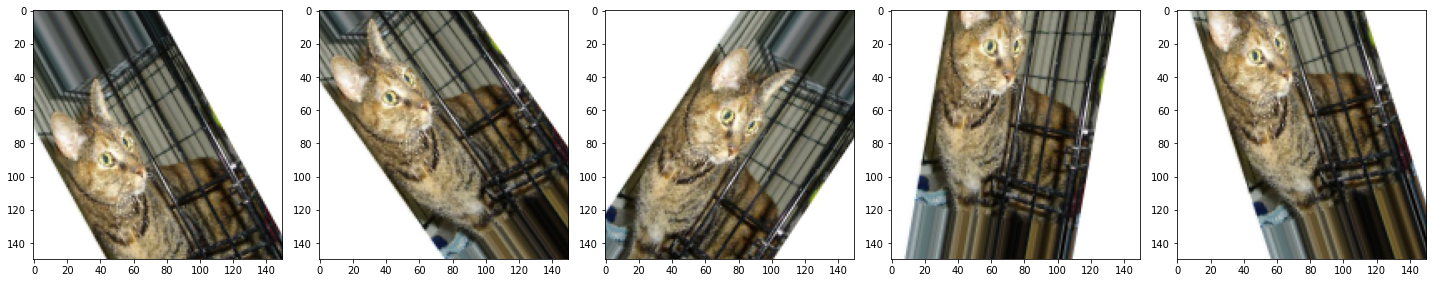

In [62]:
import matplotlib.pyplot as plt
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()
augmented_images = [train_generator[0][0][0] for i in range(5)]
plotImages(augmented_images)

In [63]:
history = model.fit(
      train_generator,
      steps_per_epoch=100,  # 8000 images = batch_size * steps
      epochs=15,     
      validation_data=test_generator,
      validation_steps=25,  # 2000 images = batch_size * steps
      verbose=2)

Epoch 1/15
100/100 - 74s - loss: 1.0242 - acc: 0.5278 - val_loss: 0.7778 - val_acc: 0.5340 - 74s/epoch - 736ms/step
Epoch 2/15
100/100 - 69s - loss: 0.7234 - acc: 0.5845 - val_loss: 0.6558 - val_acc: 0.6680 - 69s/epoch - 687ms/step
Epoch 3/15
100/100 - 69s - loss: 0.6654 - acc: 0.6399 - val_loss: 0.6718 - val_acc: 0.6080 - 69s/epoch - 686ms/step
Epoch 4/15
100/100 - 69s - loss: 0.6467 - acc: 0.6554 - val_loss: 0.6103 - val_acc: 0.6920 - 69s/epoch - 690ms/step
Epoch 5/15
100/100 - 69s - loss: 0.6375 - acc: 0.6603 - val_loss: 0.6010 - val_acc: 0.6970 - 69s/epoch - 686ms/step
Epoch 6/15
100/100 - 74s - loss: 0.6183 - acc: 0.6796 - val_loss: 0.6077 - val_acc: 0.6905 - 74s/epoch - 742ms/step
Epoch 7/15
100/100 - 68s - loss: 0.6153 - acc: 0.6875 - val_loss: 0.5786 - val_acc: 0.7095 - 68s/epoch - 683ms/step
Epoch 8/15
100/100 - 68s - loss: 0.6081 - acc: 0.6924 - val_loss: 0.5898 - val_acc: 0.7010 - 68s/epoch - 682ms/step
Epoch 9/15
100/100 - 68s - loss: 0.5918 - acc: 0.7034 - val_loss: 0.6147

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in true_divide


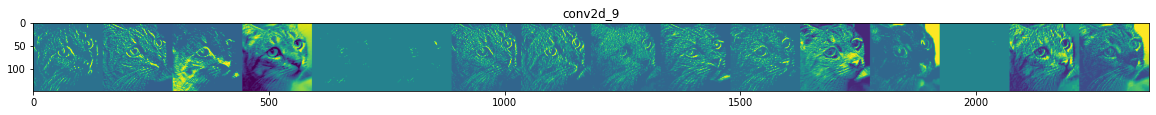

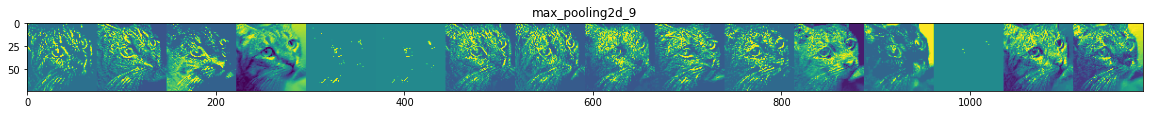

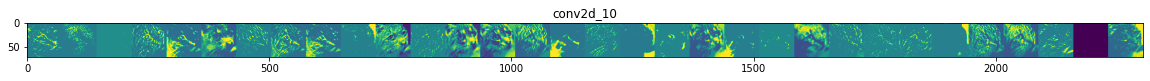

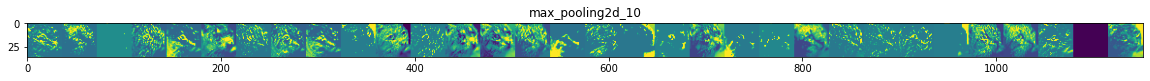

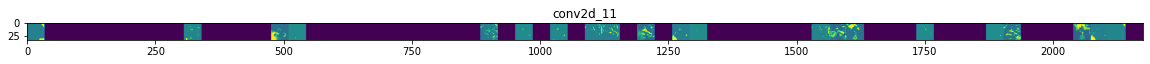

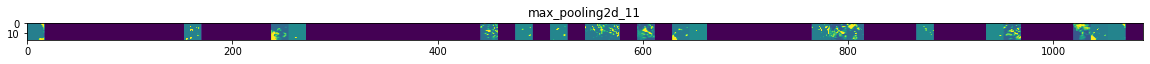

In [64]:
import numpy as np
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img

# Let's define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model after
# the first.
successive_outputs = [layer.output for layer in model.layers[1:]]
visualization_model = Model(img_input, successive_outputs)

# Let's prepare a random input image of a cat or dog from the training set.
cat_img_files = [os.path.join(train_cats_dir, f) for f in train_cat_fnames]
dog_img_files = [os.path.join(train_dogs_dir, f) for f in train_dog_fnames]
img_path = random.choice(cat_img_files + dog_img_files)

img = load_img(img_path, target_size=(150, 150))  # this is a PIL image
x = img_to_array(img)  # Numpy array with shape (150, 150, 3)
x = x.reshape((1,) + x.shape)  # Numpy array with shape (1, 150, 150, 3)

# Rescale by 1/255
x /= 255

# Let's run our image through our network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in model.layers[1:]]

# Now let's display our representations
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  if len(feature_map.shape) == 4:
    # Just do this for the conv / maxpool layers, not the fully-connected layers
    n_features = feature_map.shape[-1]  # number of features in feature map
    # The feature map has shape (1, size, size, n_features)
    size = feature_map.shape[1]
    # We will tile our images in this matrix
    display_grid = np.zeros((size, size * n_features))
    for i in range(n_features):
      # Postprocess the feature to make it visually palatable
      x = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std()
      x *= 64
      x += 128
      x = np.clip(x, 0, 255).astype('uint8')
      # We'll tile each filter into this big horizontal grid
      display_grid[:, i * size : (i + 1) * size] = x
    # Display the grid
    scale = 20. / n_features
    plt.figure(figsize=(scale * n_features, scale))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')

## Model Evaluation
### Evaluating Accuracy and Loss for the Model

Let's plot the training/validation accuracy and loss as collected during training:

In [135]:
model.evaluate(test_generator)

25/25 [==============================] - 6s 247ms/step - loss: 0.5009 - acc: 0.7670


[0.5008929371833801, 0.7670000195503235]

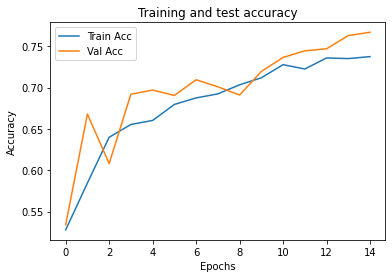

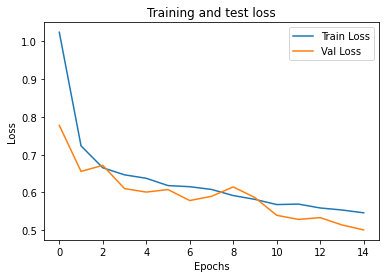

In [66]:
# Retrieve a list of accuracy results on training and test data
# sets for each training epoch
acc = history.history['acc']
val_acc = history.history['val_acc']

# Retrieve a list of list results on training and test data
# sets for each training epoch
loss = history.history['loss']
val_loss = history.history['val_loss']

# Get number of epochs
epochs = range(len(acc))

# Plot training and test accuracy per epoch
plt.plot(epochs, acc,label='Train Acc')
plt.plot(epochs, val_acc,label='Val Acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and test accuracy')
plt.legend()
plt.show()
plt.figure()

# Plot training and test loss per epoch
plt.plot(epochs, loss,label='Train Loss')
plt.plot(epochs, val_loss,label='Val Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and test loss')
plt.legend()
plt.show()

### Confusion Matrix

In [67]:
from sklearn.metrics import classification_report, confusion_matrix
Y_pred = model.predict(test_generator, 50)
y_pred = np.argmax(Y_pred, axis=1) 
#y_pred = (Y_pred > 0.5).astype(int) 
print('Confusion Matrix')
print(confusion_matrix(test_generator.classes, y_pred))

Confusion Matrix
[[1000    0]
 [1000    0]]


Building 2nd Model
Optimiser: Using a different optimizer with the appropriate LR value

In [68]:
# Additional model#2 building

# Our input feature map is 150x150x3: 150x150 for the image pixels, and 3 for
# the three color channels: R, G, and B
img_input = layers.Input(shape=(150, 150, 3))

# First convolution extracts 16 filters that are 3x3
# Convolution is followed by max-pooling layer with a 2x2 window
x = layers.Conv2D(16, 3, activation='relu')(img_input)
x = layers.MaxPooling2D(2)(x)

# Second convolution extracts 32 filters that are 3x3
# Convolution is followed by max-pooling layer with a 2x2 window
x = layers.Conv2D(32, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)

# Third convolution extracts 64 filters that are 3x3
# Convolution is followed by max-pooling layer with a 2x2 window
x = layers.Conv2D(64, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)

In [69]:
# Flatten feature map to a 1-dim tensor so we can add fully connected layers
x = layers.Flatten()(x)

# All other parameters remain same as supplied in previous model
# Network Depth: Change the number of hidden layers and hidden units
# 2 layers with units as 256 and 128

# Create a fully connected layer with ReLU activation and 512 hidden units
x = layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.01),
                activity_regularizer=regularizers.l2(0.01))(x)


# Layer 2 = hidden layer  with Regularizers
x = layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.01),
                activity_regularizer=regularizers.l2(0.01)) (x)


# Add dropout of 10% to layer 3
x = layers.Dropout(0.1)(x)

# Create output layer with a single node and sigmoid activation
output = layers.Dense(1, activation='sigmoid')(x)

# Create model:
# input = input feature map
# output = input feature map + stacked convolution/maxpooling layers + fully 
# connected layer + sigmoid output layer
model2 = Model(img_input, output)


In [70]:
model2.summary()

Model: "model_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 conv2d_12 (Conv2D)          (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 74, 74, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 36, 36, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 34, 34, 64)        1849

In [71]:
#HyperTuning 
# Change Optimizer to Adam
from tensorflow.keras.optimizers import Adam

model2.compile( optimizer = 'Adam', loss = 'binary_crossentropy', metrics=['accuracy'] )

In [72]:
      history2 = model2.fit(
      train_generator,
      steps_per_epoch=100,  # 2000 images = batch_size * steps
      epochs=15,
      validation_data=test_generator,
      validation_steps=25,  # 1000 images = batch_size * steps
      verbose=2)


Epoch 1/15
100/100 - 85s - loss: 1.6074 - accuracy: 0.5468 - val_loss: 0.7724 - val_accuracy: 0.5785 - 85s/epoch - 852ms/step
Epoch 2/15
100/100 - 98s - loss: 0.7174 - accuracy: 0.5114 - val_loss: 0.6949 - val_accuracy: 0.5000 - 98s/epoch - 982ms/step
Epoch 3/15
100/100 - 94s - loss: 0.6935 - accuracy: 0.4989 - val_loss: 0.6932 - val_accuracy: 0.5000 - 94s/epoch - 940ms/step
Epoch 4/15
100/100 - 69s - loss: 0.6932 - accuracy: 0.5019 - val_loss: 0.6932 - val_accuracy: 0.5000 - 69s/epoch - 689ms/step
Epoch 5/15
100/100 - 70s - loss: 0.6932 - accuracy: 0.4918 - val_loss: 0.6932 - val_accuracy: 0.5000 - 70s/epoch - 696ms/step
Epoch 6/15
100/100 - 95s - loss: 0.6932 - accuracy: 0.4966 - val_loss: 0.6932 - val_accuracy: 0.5000 - 95s/epoch - 948ms/step
Epoch 7/15
100/100 - 71s - loss: 0.6932 - accuracy: 0.4897 - val_loss: 0.6932 - val_accuracy: 0.5000 - 71s/epoch - 710ms/step
Epoch 8/15
100/100 - 70s - loss: 0.6932 - accuracy: 0.4888 - val_loss: 0.6932 - val_accuracy: 0.5000 - 70s/epoch - 698

In [134]:
model2.evaluate(test_generator)

25/25 [==============================] - 6s 248ms/step - loss: 0.6931 - accuracy: 0.5000


[0.6931484937667847, 0.5]

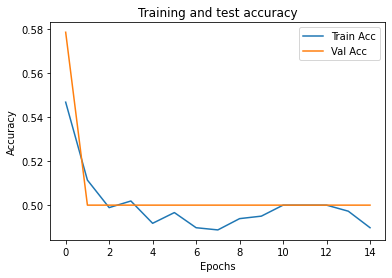

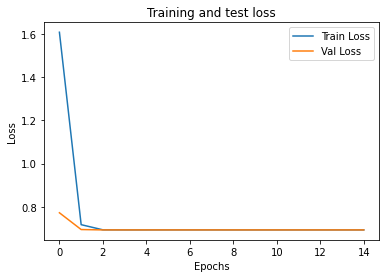

In [87]:
# Retrieve a list of accuracy results on training and test data
# sets for each training epoch
acc = history2.history['accuracy']
val_acc = history2.history['val_accuracy']

# Retrieve a list of list results on training and test data
# sets for each training epoch
loss = history2.history['loss']
val_loss = history2.history['val_loss']

# Get number of epochs
epochs = range(len(acc))

# Plot training and test accuracy per epoch
plt.plot(epochs, acc,label='Train Acc')
plt.plot(epochs, val_acc,label='Val Acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and test accuracy')
plt.legend()
plt.show()
plt.figure()

# Plot training and test loss per epoch
plt.plot(epochs, loss,label='Train Loss')
plt.plot(epochs, val_loss,label='Val Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and test loss')
plt.legend()
plt.show()

In [126]:
# Additional model#3 building

# Our input feature map is 150x150x3: 150x150 for the image pixels, and 3 for
# the three color channels: R, G, and B
img_input = layers.Input(shape=(150, 150, 3))

# First convolution extracts 16 filters that are 3x3
# Convolution is followed by max-pooling layer with a 2x2 window
x = layers.Conv2D(16, 3, activation='relu')(img_input)
x = layers.MaxPooling2D(2)(x)

# Second convolution extracts 32 filters that are 3x3
# Convolution is followed by max-pooling layer with a 2x2 window
x = layers.Conv2D(32, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)

# Third convolution extracts 64 filters that are 3x3
# Convolution is followed by max-pooling layer with a 2x2 window
x = layers.Conv2D(64, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)

In [127]:
# Flatten feature map to a 1-dim tensor so we can add fully connected layers
x = layers.Flatten()(x)

#Network Depth: Change the number of hidden layers and hidden units.
# 2 layers with units as 512 and 64
# Create a fully connected layer with ReLU activation and 512 hidden units
x = layers.Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.01))(x)


# Add dropout of 40% to layer 3
x = layers.Dropout(0.4)(x)


# Layer 2 = hidden layer  with Regularizers
x = layers.Dense(16, activation='relu', kernel_regularizer=regularizers.l2(0.01)) (x)

# Create output layer with a single node and sigmoid activation
output = layers.Dense(1, activation='sigmoid')(x)

# Create model:
# input = input feature map
# output = input feature map + stacked convolution/maxpooling layers + fully 
# connected layer + sigmoid output layer
model3 = Model(img_input, output)


In [128]:
model3.summary()

Model: "model_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_11 (InputLayer)       [(None, 150, 150, 3)]     0         
                                                                 
 conv2d_30 (Conv2D)          (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d_30 (MaxPoolin  (None, 74, 74, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_31 (Conv2D)          (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_31 (MaxPoolin  (None, 36, 36, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_32 (Conv2D)          (None, 34, 34, 64)        184

In [129]:
#HyperTuning 
# Change Optimizer to Adagrad
from tensorflow.keras.optimizers import Adagrad

model3.compile( optimizer = Adagrad(learning_rate=0.001), loss = 'binary_crossentropy', metrics=['accuracy'] )

In [130]:
 history3 = model3.fit(
      train_generator,
      steps_per_epoch=100,  # 2000 images = batch_size * steps
      epochs=15,
      validation_data=test_generator,
      validation_steps=25,  # 1000 images = batch_size * steps
      verbose=2)

Epoch 1/15
100/100 - 69s - loss: 1.5255 - accuracy: 0.5066 - val_loss: 1.5191 - val_accuracy: 0.5305 - 69s/epoch - 694ms/step
Epoch 2/15
100/100 - 73s - loss: 1.5134 - accuracy: 0.5269 - val_loss: 1.5077 - val_accuracy: 0.5415 - 73s/epoch - 727ms/step
Epoch 3/15
100/100 - 78s - loss: 1.5032 - accuracy: 0.5191 - val_loss: 1.4965 - val_accuracy: 0.5675 - 78s/epoch - 777ms/step
Epoch 4/15
100/100 - 68s - loss: 1.4925 - accuracy: 0.5316 - val_loss: 1.4857 - val_accuracy: 0.5785 - 68s/epoch - 676ms/step
Epoch 5/15
100/100 - 68s - loss: 1.4827 - accuracy: 0.5263 - val_loss: 1.4756 - val_accuracy: 0.5835 - 68s/epoch - 678ms/step
Epoch 6/15
100/100 - 68s - loss: 1.4715 - accuracy: 0.5400 - val_loss: 1.4644 - val_accuracy: 0.5880 - 68s/epoch - 676ms/step
Epoch 7/15
100/100 - 68s - loss: 1.4615 - accuracy: 0.5396 - val_loss: 1.4547 - val_accuracy: 0.5885 - 68s/epoch - 676ms/step
Epoch 8/15
100/100 - 68s - loss: 1.4520 - accuracy: 0.5401 - val_loss: 1.4438 - val_accuracy: 0.5850 - 68s/epoch - 676

In [132]:
model3.evaluate(test_generator)

25/25 [==============================] - 6s 245ms/step - loss: 1.3769 - accuracy: 0.6040


[1.3769476413726807, 0.6039999723434448]

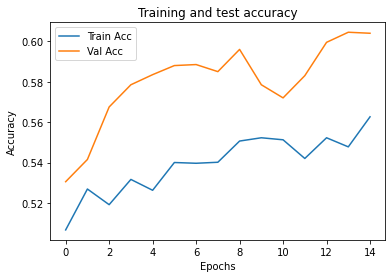

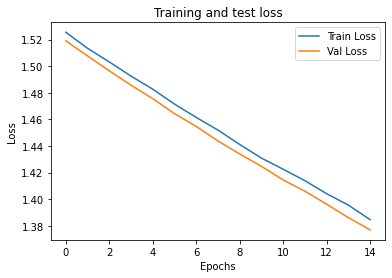

In [133]:
# Retrieve a list of accuracy results on training and test data
# sets for each training epoch
acc = history3.history['accuracy']
val_acc = history3.history['val_accuracy']

# Retrieve a list of list results on training and test data
# sets for each training epoch
loss = history3.history['loss']
val_loss = history3.history['val_loss']

# Get number of epochs
epochs = range(len(acc))

# Plot training and test accuracy per epoch
plt.plot(epochs, acc,label='Train Acc')
plt.plot(epochs, val_acc,label='Val Acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and test accuracy')
plt.legend()
plt.show()
plt.figure()

# Plot training and test loss per epoch
plt.plot(epochs, loss,label='Train Loss')
plt.plot(epochs, val_loss,label='Val Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and test loss')
plt.legend()
plt.show()